**CNN**: is a deep learning model mainly used for images and videos.
####Use Cases:
* Image classification (PIzaa or Steak)
* Face Recognition (Wearning mask or without mast)
* Medical Imaging
* Video Classification (action detection, surveillance)
* Self Driving Cars


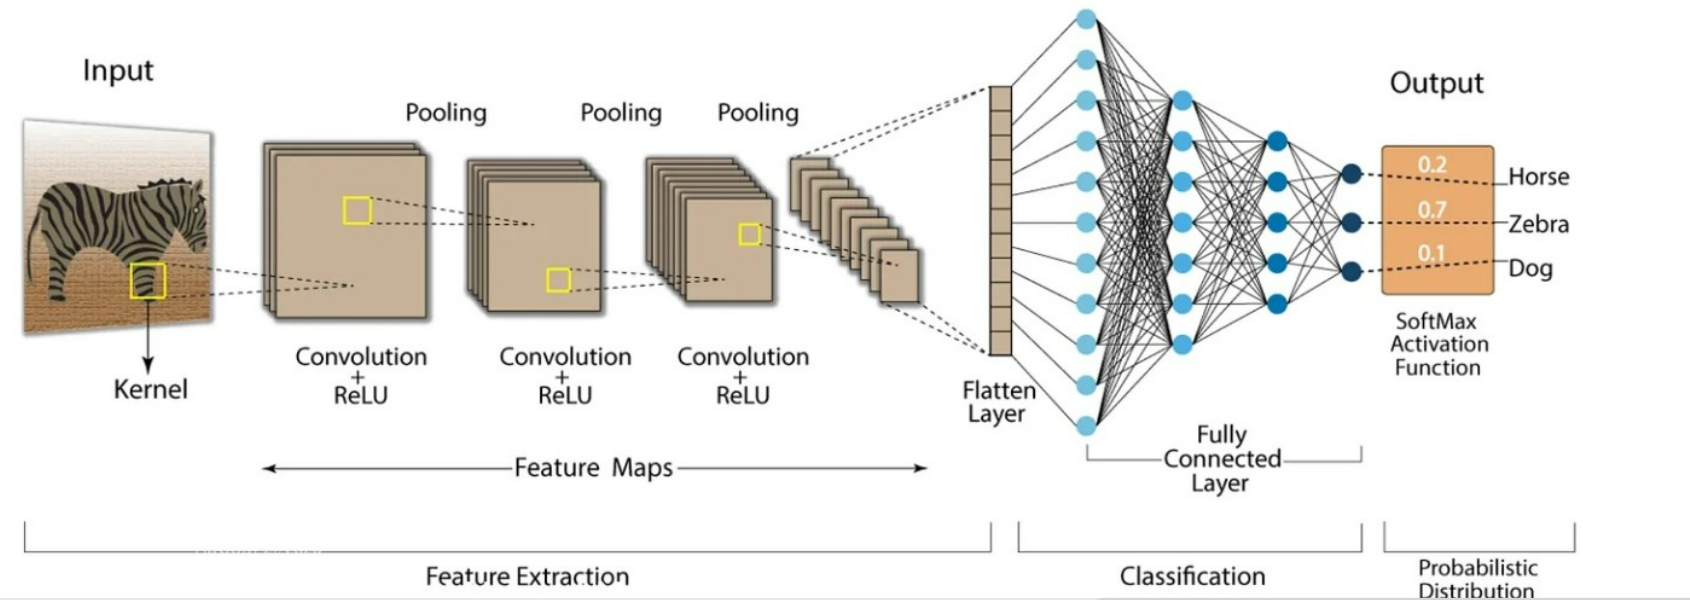

* 1. Convolution Layer: Detects Edges and Patterns
* 2. ReLU: Keeps Positive values
* 3. Pooling: Reduce Image Size
* 4. Flatten: Covnerts to 1D
* 5. Dense Layer: Final Decision for example in above image (Hores,Zebar or Dog)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import zipfile


In [2]:
print(tf.__version__)

2.19.0


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 1.57GB/s]
100% 163M/163M [00:00<00:00, 1.42GB/s]


In [4]:
with zipfile.ZipFile('/content/face-mask-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [5]:
base_dir='data'
os.listdir(base_dir)

['without_mask', 'with_mask']

In [6]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
training_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,class_mode='binary',subset='training',seed=42)

Found 6043 images belonging to 2 classes.


In [8]:
testing_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,class_mode='binary',subset='validation',seed=42)

Found 1510 images belonging to 2 classes.


In [9]:
#Create Model and Add Layers
model=Sequential(
    [   tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ]

)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,175,777 (84.59 MB)

 Trainable params: 22,175,777 (84.59 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Training
history=model.fit(training_data,epochs=10,validation_data=testing_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
120/189 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.7183 - loss: 0.6658

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7601 - loss: 0.5634 - val_accuracy: 0.9099 - val_loss: 0.2335
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.9002 - loss: 0.2450 - val_accuracy: 0.9132 - val_loss: 0.2312
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9432 - loss: 0.1543 - val_accuracy: 0.9192 - val_loss: 0.2173
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9548 - loss: 0.1182 - val_accuracy: 0.9503 - val_loss: 0.1795
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9742 - loss: 0.0762 - val_accuracy: 0.9318 - val_loss: 0.1990
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9853 - loss: 0.0408 - val_accuracy: 0.9351 - val_loss: 0.2446
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9820 - loss: 0.0412 - val_accuracy: 0.9424 - val_loss: 0.2106
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9910 - loss: 0.0260 - val_accura

In [13]:
loss,accuracy=model.evaluate(testing_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9492 - loss: 0.1980
Loss: 0.2384478598833084
Accuracy: 0.9450331330299377


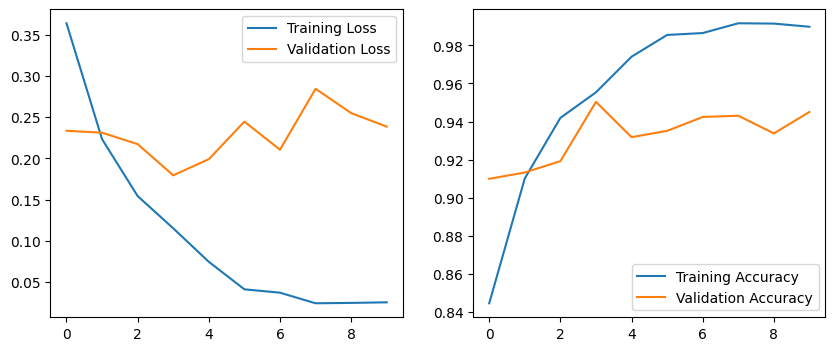

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


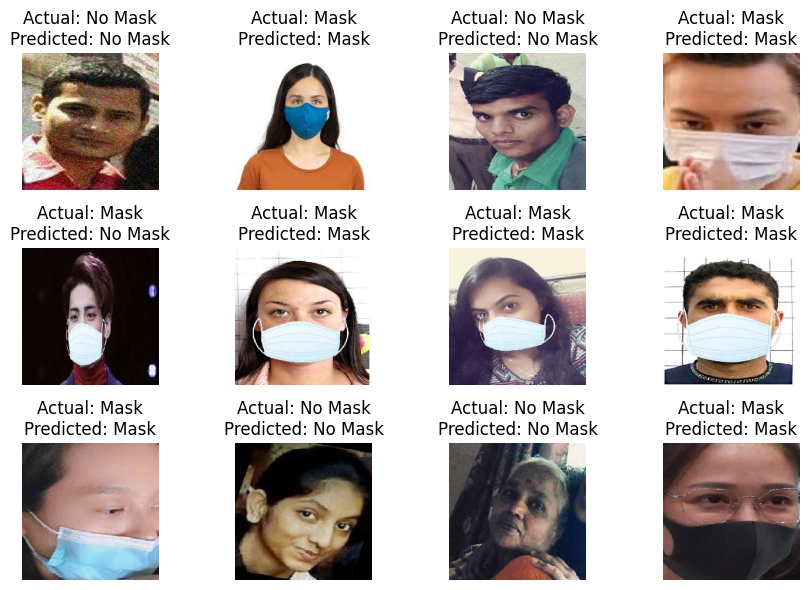

In [36]:
#prediction
image,lables=next(testing_data)
prediction=model.predict(image)
plt.figure(figsize=(10,6))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(image[i])
  plt.axis('off')
  true_label='Mask' if lables[i]==0 else 'No Mask'
  pred_label='Mask' if prediction[i]<0.5 else 'No Mask'
  plt.title(f'Actual: {true_label}\nPredicted: {pred_label}')
  plt.tight_layout()
plt.show()



Saving jinah.jpg to jinah (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: No Mask


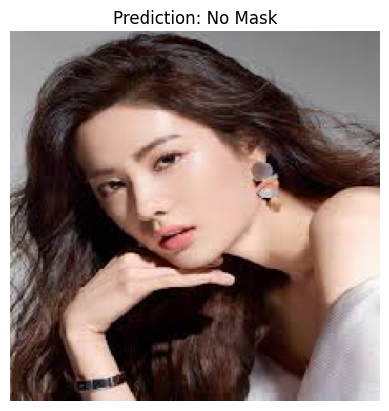

In [43]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  imag_path='/content/'+fn
  img=image.load_img(imag_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x/=255.0
  prediction=model.predict(x)[0][0]
  label='Mask' if prediction<0.5 else 'No Mask'
  print(f'Prediction: {label}')
  plt.imshow(img)
  plt.axis('off')
  plt.title(f'Prediction: {label}')
  plt.show()


